In [19]:
import numpy as np
import music21
import pandas as pd
import seaborn as sns
from mingus.core import chords
from chord_extractor.extractors import Chordino

In [18]:
chordino = Chordino(roll_on=1)

In [3]:
filename = "./data/Thesis/Complete Examples/Real Book/All Of Me.mid"

In [4]:
def get_chords_music21():
    mf = music21.midi.MidiFile()
    mf.open(filename)
    mf.read()

    tracks = [t for t in mf.tracks if not any([e.channel == 10 for e in t.events])]        
    score = music21.stream.Score()
    music21.midi.translate.midiTracksToStreams(tracks,                                            
        inputM21=score,
        ticksPerQuarter=mf.ticksPerQuarterNote,
    )   
    
    return score.chordify().flat.notes

In [5]:
def get_chords_chordify(filename):
    orig_conversion_file_path = chordino.preprocess(filename)
    orig_chords = chordino.extract(orig_conversion_file_path)
    orig_chord_names = [c.chord for c in orig_chords]
    
    chord_extractor.clear_conversion_cache()
    
    print(orig_conversion_file_path)
    print("-".join(orig_chord_names))
    print('---------------')

In [6]:
a = [ 'Am', 'C',   'F',   'G',   'D', 'G/E' ]
b = [ 'C',  'Am7', 'FM7', 'Em7', 'D', 'G'   ]

In [55]:
def chord_score(c1, c2):    
        notes_a = chords.from_shorthand(c1)
        notes_b = chords.from_shorthand(c2)
        root_a = notes_a[0]
        root_b = notes_b[0]
        notes_set_a = set(notes_a)
        notes_set_b = set(notes_b)
        shared_a = notes_set_a.intersection(notes_set_b)
        shared_b = notes_set_b.intersection(notes_set_a)

        try:
            root_score = (len(notes_b) - notes_b.index(root_a)) / len(notes_b)
        except ValueError:
            root_score = 0

        notes_score_a = len(shared_a) / float(len(notes_a))
        notes_score_b = len(shared_b) / float(len(notes_b))
        notes_score = (1/2) * notes_score_a + (1/2) * notes_score_b
        score = ((1/5) * root_score) + ((4/5) * notes_score)

#         print(c1, c2)
#         print(notes_a, notes_b)
#         print(root_a, root_b)
#         print(notes_set_a, notes_set_b)
#         print(shared_a, shared_b)
#         print(root_score, notes_score)
#         print(score)
#         print('-------')

        return score

In [8]:
for i in range(len(a)):
    chord_score(a[i], b[i])

In [165]:
orig = pd.read_csv('./data/chords/Real Book/All Of Me_synth.csv')
impro = pd.read_csv('./data/chords/Jazz-Midi/All Of Me_synth.csv')

In [166]:
orig['chord'] = orig['chord'].str.replace(":maj", "")
orig['chord'] = orig['chord'].str.replace(":min", "m")
impro['chord'] = impro['chord'].str.replace(":maj", "")
impro['chord'] = impro['chord'].str.replace(":min", "m")

In [167]:
mapping = [
    'C','Db','D','Eb','E','F','F#','G','Ab','A','Bb','B',
    'C','C#','D','D#','E','F','Gb','G','G#','A','A#','B',
    'Am','Bbm','Bm','Cm','Dbm','Dm','Ebm','Em','Fm','F#m','Gm','Abm',
    'Am','C#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','Gbm','Gm','G#m'
]

In [168]:
orig['chord_n'] = [mapping.index(c)%12 for c in orig['chord']]
impro['chord_n'] = [mapping.index(c)%12 for c in impro['chord']]

In [169]:
orig_start = orig['start'].iloc[0].copy()
impro_start = impro['start'].iloc[0].copy()

orig['start'] = orig['start'] - orig_start
orig['end'] = orig['end'] - orig_start
impro['start'] = impro['end'] - impro_start
impro['end'] = impro['end'] - impro_start

In [347]:
orig_c = list(orig['chord'])
impro_c = list(impro['chord'])

tot_scores = []

for i in range(min(len(orig_c), len(impro_c))):
    scores = []
    for j in range(min(len(orig_c), len(impro_c))):
        scores.append(chord_score(orig_c[j], impro_c[j]))
    
    orig_c.pop(0)
        
    tot_scores.append(np.mean(scores))

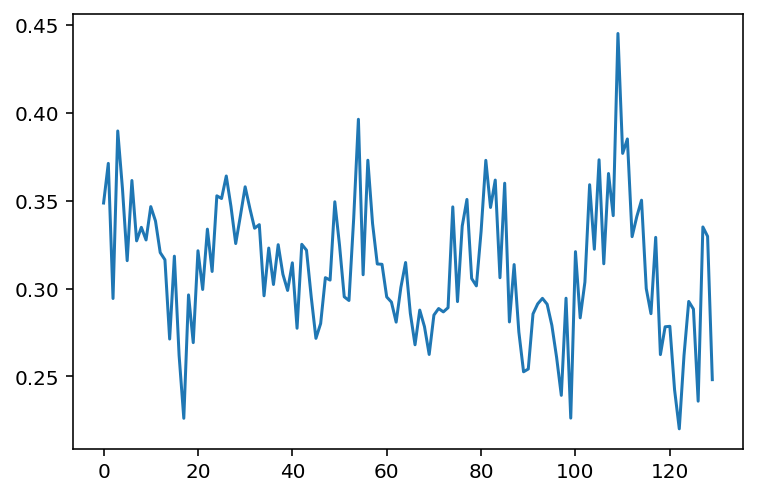

In [348]:
from matplotlib import pyplot as plt
plt.plot(tot_scores)

In [349]:
j = 3
print(sorted(range(len(tot_scores)), key=lambda i: tot_scores[i])[-j:])
print(sorted(tot_scores)[-j:])

[3, 54, 109]
[0.38974358974358975, 0.39639639639639634, 0.44523809523809527]


In [350]:
list(orig['chord'])

['C',
 'Em',
 'Am',
 'Am',
 'Bm',
 'E',
 'E',
 'D',
 'E',
 'D',
 'Em',
 'Am',
 'Am',
 'Dm',
 'Dm',
 'F',
 'Bm',
 'G',
 'Bm',
 'E',
 'Am',
 'E',
 'Am',
 'F',
 'C',
 'Am',
 'Am',
 'Am',
 'D',
 'F',
 'F',
 'C',
 'C',
 'Bm',
 'E',
 'D',
 'E',
 'Em',
 'A',
 'A',
 'F',
 'Dm',
 'A',
 'F',
 'Dm',
 'F',
 'D',
 'C',
 'Em',
 'A',
 'D',
 'Dm',
 'G',
 'C',
 'Am',
 'Dm',
 'G',
 'C',
 'G',
 'C',
 'Bm',
 'D',
 'D',
 'Fm',
 'Fm',
 'Am',
 'Fm',
 'Fm',
 'Fm',
 'Am',
 'Fm',
 'Am',
 'Am',
 'Fm',
 'Bm',
 'D',
 'Am',
 'C',
 'Fm',
 'Fm',
 'Em',
 'C',
 'Em',
 'C',
 'C#',
 'D',
 'E',
 'Fm',
 'Fm',
 'F',
 'C',
 'F',
 'Dm',
 'F#m',
 'B',
 'C',
 'F',
 'Em',
 'A',
 'C#',
 'Fm',
 'Fm',
 'Am',
 'Fm',
 'Am',
 'Am',
 'C',
 'C',
 'Am',
 'C',
 'B',
 'E',
 'D',
 'D',
 'D',
 'Em',
 'A',
 'Dm',
 'Dm',
 'F',
 'E',
 'D',
 'D',
 'E',
 'Am',
 'C',
 'Am',
 'C',
 'D',
 'F',
 'G',
 'G',
 'C',
 'G',
 'C',
 'Bm',
 'D',
 'Bm',
 'E',
 'F#m',
 'E',
 'Em',
 'G',
 'Em',
 'A',
 'Dm',
 'Dm',
 'F',
 'Dm',
 'G',
 'D',
 'C',
 'F',
 'Em',
 'A'

In [351]:
list(impro['chord'])

['C',
 'B',
 'F',
 'G#',
 'F#m',
 'F',
 'Em',
 'D',
 'C',
 'E',
 'E',
 'A',
 'A',
 'A',
 'Dm',
 'E',
 'Am',
 'D',
 'G',
 'Dm',
 'F',
 'C',
 'E',
 'C',
 'C',
 'C',
 'E',
 'C',
 'E',
 'E',
 'E',
 'A',
 'E',
 'E',
 'A',
 'A',
 'Dm',
 'F',
 'Dm',
 'F',
 'Em',
 'F',
 'F',
 'Dm',
 'F',
 'C#',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'Dm',
 'C',
 'G',
 'C',
 'Am',
 'E',
 'Cm',
 'B',
 'E',
 'E',
 'A',
 'Dm',
 'A',
 'Dm',
 'E',
 'F',
 'E',
 'A#',
 'Am',
 'Am',
 'D',
 'Am',
 'D',
 'F',
 'Am',
 'C',
 'Am',
 'E',
 'E',
 'A#',
 'Dm',
 'Am',
 'Am',
 'C',
 'B',
 'C',
 'G',
 'Dm',
 'F',
 'Dm',
 'Dm',
 'Dm',
 'C',
 'Am',
 'Am',
 'C',
 'E',
 'F',
 'E',
 'A',
 'Am',
 'Dm',
 'Am',
 'A',
 'Dm',
 'A#',
 'C',
 'Dm',
 'Em',
 'A',
 'F',
 'Dm',
 'C',
 'Dm',
 'C',
 'Dm',
 'Dm',
 'F',
 'Fm',
 'F',
 'D#m',
 'F',
 'D',
 'D',
 'C',
 'G',
 'C',
 'C']

In [222]:
f_orig = "./data/Thesis/Complete Examples/Real Book/All Of Me.mid"
f_impro = "./data/Thesis/Complete Examples/Jazz-Midi/All Of Me.mid"

s_orig  = music21.converter.parse(f_orig)
s_impro = music21.converter.parse(f_impro)

In [ ]:
def transpose_to_c(s):
    key = s.analyze('key')
    
    if key.mode == 'major':
        base = 'C'
    else:
        base = 'A'
        
    inter = music21.interval.Interval(music21.pitch.Pitch(base), key.tonic)
    
    return s.transpose(inter, inPlace=True)

In [172]:
def tempo_to_120(s):
    t = tempo.MetronomeMark(number=120)
    
    for s_orig.metronomeMarkBoundaries()
    

/Users/manu/PycharmProjects/thesis/venv/lib/python3.8/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=2, channel=None, data=b'Bater\xeda'>; getting generic Instrument
  warnings.warn(
/Users/manu/PycharmProjects/thesis/venv/lib/python3.8/site-packages/music21/midi/translate.py:790: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent PROGRAM_CHANGE, track=2, channel=10, data=0>; getting generic UnpitchedPercussion
  warnings.warn(
/Users/manu/PycharmProjects/thesis/venv/lib/python3.8/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Melod\xeda'>; getting generic Instrument
  warnings.warn(
/Users/manu/PycharmProjects/thesis/venv/lib/python3.8/site-packages/music21/midi/translate.py:790: TranslateWarning: Unable to determine instrument from

In [179]:

key_impro = s_impro.analyze('key')

In [190]:
s_orig.metronomeMarkBoundaries()[-1][-1].number

140.0

In [191]:
s_impro.metronomeMarkBoundaries()[-1][-1].number

130.0

In [238]:
s_orig.metronomeMarkBoundaries((0, 0, music21.tempo.MetronomeMark(number=120.0)))

AttributeError: 'list' object has no attribute 'flatten'

In [246]:
s_orig = s_orig.remove(s_orig.metronomeMarkBoundaries()[-1][-1])

In [216]:
CIRCLE_OF_FIFTHS_MAJ = ['C', 'G', 'D', 'A', 'E', 'B', 'F#', 'Db', 'Ab', 'Eb', 'Bb', 'F']
CIRCLE_OF_FIFTHS_MIN = ['Am', 'Em', 'Bm', 'F#m', 'Dbm', 'Abm', 'Ebm', 'Bbm', 'Fm', 'Cm', 'Gm', 'Dm']

In [247]:
s_orig.metronomeMarkBoundaries()

AttributeError: 'NoneType' object has no attribute 'metronomeMarkBoundaries'

In [287]:
import os 
import copy
import pretty_midi as pm

def prepare_midi_for_chord_analysis(f):
    
    pm_m = pm.PrettyMIDI(file)
    
    pm_m.set
    
#     old_s  = music21.converter.parse(f)
#     new_s  = music21.stream.Stream()
    
#     new_s.insert(0, music21.metadata.Metadata())
    
#     for p in old_s.parts:
#         new_p = music21.stream.Stream()
#         for note in p.flat.notesAndRests:
#             new_p.insert(note)
#         new_s.insert(0, new_p)
    
#     m = music21.tempo.MetronomeMark(number=120.0)
#     new_s.append(m)
    
#     new_s.write('midi', './data/chords/ready/All of Me.mid')
    
#     old_key = s.analyze('key')
    
#     if key.mode == 'major':
#         base = 'C'
#     else:
#         base = 'A'
        
#     inter = music21.interval.Interval(music21.pitch.Pitch(base), key.tonic)
    
#     new_key = old_key.transpose
    

SyntaxError: unexpected EOF while parsing (581157088.py, line 35)

In [286]:
prepare_midi_for_chord_analysis(f_orig)

In [ ]:
p.partName

In [298]:
a= [0,1,2,3,4]

In [304]:
a

[1, 2, 3]